In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False

# 读取处理后的数据
df = pd.read_csv('processed_imo_data.csv')

# 1. 基础统计分析
print("1. 国家基础统计分析")
print("-" * 50)

# 计算国家级统计
country_stats = df.groupby('country').agg({
    'contestant': 'count',
    'total': ['mean', 'std'],
    'award': lambda x: (x == 'Gold Medal').mean() * 100,
    'problem_completion': 'mean'
}).round(2)

country_stats.columns = ['参赛人数', '平均分', '标准差', '金牌率(%)', '平均完成题数']
country_stats = country_stats[country_stats['参赛人数'] >= 10].sort_values('平均分', ascending=False)

print("\n表现最好的10个国家：")
print(country_stats.head(10))

# 2. 金牌分析
plt.figure(figsize=(15, 5))

# 金牌总数
plt.subplot(1, 2, 1)
gold_medals = df[df['award'] == 'Gold Medal'].groupby('country').size().sort_values(ascending=False)
gold_medals.head(10).plot(kind='bar')
plt.title('各国金牌总数（前10名）')
plt.xlabel('国家')
plt.ylabel('金牌数量')
plt.xticks(rotation=45)

# 金牌率
plt.subplot(1, 2, 2)
gold_rates = country_stats['金牌率(%)'].sort_values(ascending=False).head(10)
gold_rates.plot(kind='bar')
plt.title('各国金牌率（前10名）')
plt.xlabel('国家')
plt.ylabel('金牌率(%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. 时间趋势分析
print("\n3. 时间趋势分析")
print("-" * 50)

# 计算年度表现
yearly_performance = df.groupby(['year', 'country']).agg({
    'total': 'mean',
    'award': lambda x: (x == 'Gold Medal').mean() * 100
}).reset_index()

# 选择表现最好的5个国家
top_5_countries = country_stats.head(5).index.tolist()

plt.figure(figsize=(15, 5))

# 平均分趋势
plt.subplot(1, 2, 1)
for country in top_5_countries:
    country_data = yearly_performance[yearly_performance['country'] == country]
    plt.plot(country_data['year'], country_data['total'], label=country, marker='o')
plt.title('顶尖国家平均分趋势')
plt.xlabel('年份')
plt.ylabel('平均分')
plt.legend()
plt.grid(True, alpha=0.3)

# 金牌率趋势
plt.subplot(1, 2, 2)
for country in top_5_countries:
    country_data = yearly_performance[yearly_performance['country'] == country]
    plt.plot(country_data['year'], country_data['award'], label=country, marker='o')
plt.title('顶尖国家金牌率趋势')
plt.xlabel('年份')
plt.ylabel('金牌率(%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 地区分布分析
print("\n4. 地区分布分析")
print("-" * 50)

# 计算各大洲的表现
# 这里需要添加国家到大洲的映射
# 为简化示例，这里只展示部分国家
continent_map = {
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'United States': 'North America',
    'Canada': 'North America',
    'Russia': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Australia': 'Oceania'
}

df['continent'] = df['country'].map(continent_map)

continent_stats = df[df['continent'].notna()].groupby('continent').agg({
    'contestant': 'count',
    'total': 'mean',
    'award': lambda x: (x == 'Gold Medal').mean() * 100
}).round(2)

continent_stats.columns = ['参赛人数', '平均分', '金牌率(%)']
print("\n各大洲表现统计：")
print(continent_stats.sort_values('平均分', ascending=False))


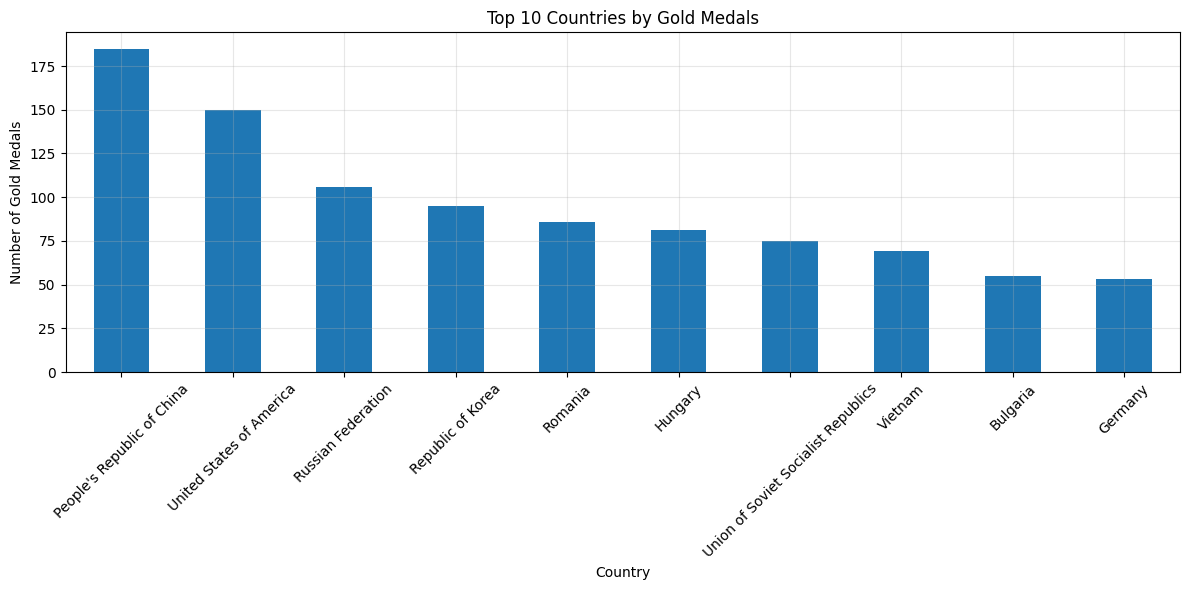

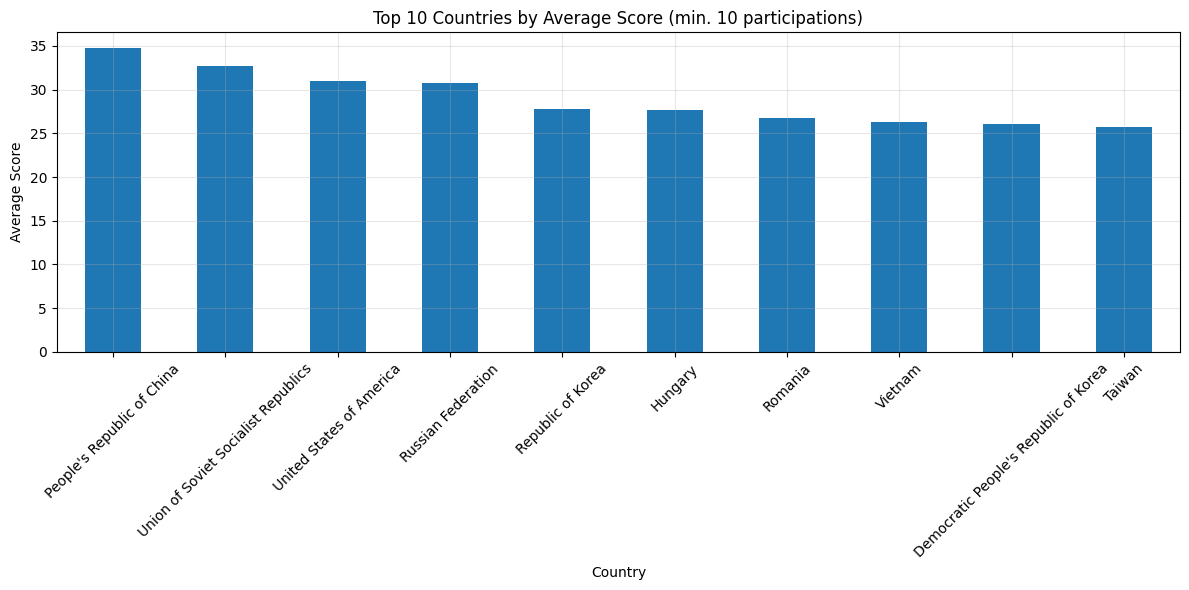

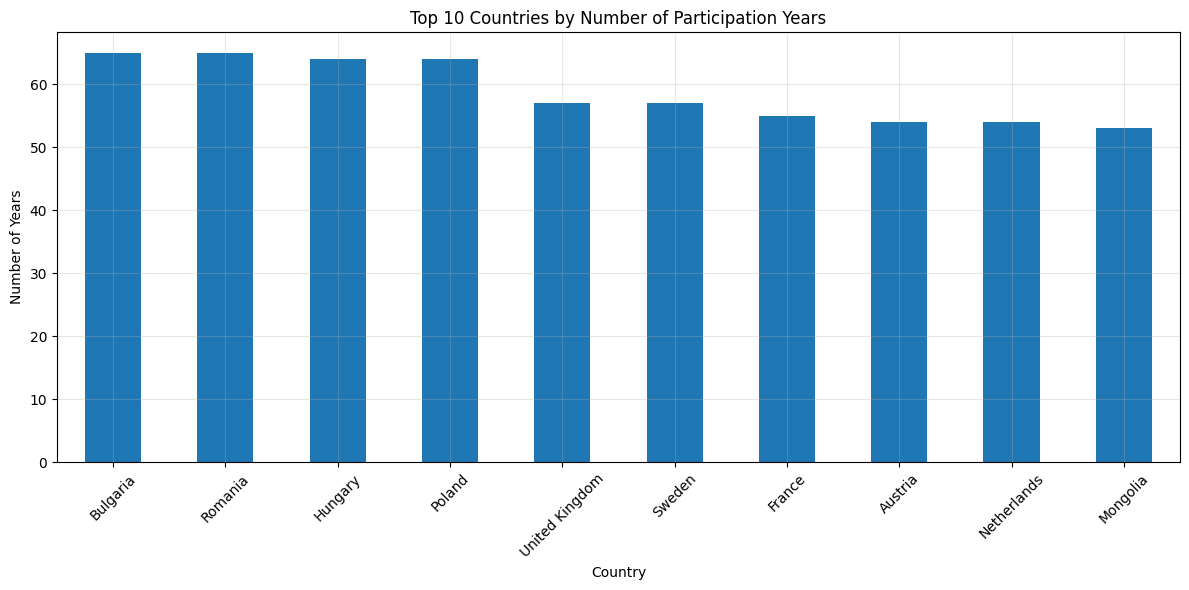

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init()

import matplotlib
matplotlib.rcParams['font.family'] = 'Source Han Sans CN'
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('individual_results_df.csv')

# 修复奖项名称（大小写敏感）
df['award'] = df['award'].str.replace('medal', 'Medal')

# 1. 金牌获得情况分析
gold_medals = df[df['award'] == 'Gold Medal'].groupby('country').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
gold_medals.head(10).plot(kind='bar')
plt.title('各国金牌总数排名（前10名）')
plt.xlabel('国家')
plt.ylabel('金牌数量')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 国家平均分析（考虑参与度）
country_scores = df.groupby('country').agg({
    'total': ['mean', 'count'],
    'award': lambda x: (x == 'Gold Medal').mean() * 100  # 金牌获得率
}).round(2)
country_scores.columns = ['平均分', '参与人次', '金牌率(%)']

# 仅考虑参与超过10次的国家
top_countries = country_scores[country_scores['参与人次'] >= 10].sort_values('平均分', ascending=False).head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

top_countries['平均分'].plot(kind='bar', ax=ax1)
ax1.set_title('各国平均分排名（前10名）\n仅包含参与超过10次的国家')
ax1.set_xlabel('国家')
ax1.set_ylabel('平均分')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

top_countries['金牌率(%)'].plot(kind='bar', ax=ax2)
ax2.set_title('各国金牌获得率（前10名）\n仅包含参与超过10次的国家')
ax2.set_xlabel('国家')
ax2.set_ylabel('金牌获得率(%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 参与年份和趋势分析
participation_years = df.groupby('country')['year'].agg(['nunique', 'min', 'max']).round(2)
participation_years.columns = ['参与年数', '首次参与', '最近参与']
participation_years['参与跨度'] = participation_years['最近参与'] - participation_years['首次参与']

# 展示参与年数最多的10个国家
plt.figure(figsize=(12, 6))
participation_years.sort_values('参与年数', ascending=False).head(10)['参与年数'].plot(kind='bar')
plt.title('各国参与年数排名（前10名）')
plt.xlabel('国家')
plt.ylabel('参与年数')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 国家实力演变趋势
top_5_countries = gold_medals.head(5).index

plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = df[df['country'] == country].groupby('year')['total'].mean().rolling(3).mean()
    plt.plot(country_data.index, country_data.values, label=country, marker='o')
plt.title('顶尖国家实力演变趋势（3年移动平均）')
plt.xlabel('年份')
plt.ylabel('平均总分')
plt.legend(title='国家')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
